In [1]:
import numpy as np 
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

In [2]:
def ec_schordinger (x,y,E):
    #y es el vector = [f,f´]
    f,df= y
    ddf = (x**2-2*E)*f
    return [df,ddf]

In [3]:
def evento_convergencia(x, y, E, threshold=10):
    # y[0] es f(x)
    return threshold - abs(y[0])


In [4]:
def solve_for_energy(E, x_max=6.0, n_points=200):
    y0 = [1.0, 0.0]  # f(0)=1, f'(0)=0 (pares)
    x_span = (0, x_max)
    
    ev_func = lambda x, y: evento_convergencia(x, y, E)
    ev_func.terminal = True
    ev_func.direction = -1

    sol = solve_ivp(
        lambda x, y: ec_schordinger(x, y, E),
        x_span,
        y0,
        rtol=1e-7, 
        atol=1e-9,
        events=lambda x, y: evento_convergencia(x, y, E)   
    )
    
    f_at_end = sol.y[0][-1] 
    event_triggered = (len(sol.t_events[0]) > 0)
    return sol, event_triggered


In [5]:
energies = np.arange(0.0, 10.0, 0.1)
candidates = []  # Aquí se guardarán las energías donde la solución converge

for E in energies:
    sol, event_triggered = solve_for_energy(E)
    print("E = {:.2f}, evento disparado: {}".format(E, event_triggered))
    # Si el evento NO se dispara, la solución llegó a x_max sin divergencia
    if not event_triggered:
        candidates.append(E)

print("\nEnergías candidatas (donde la solución no diverge):")
print(candidates)

E = 0.00, evento disparado: True
E = 0.10, evento disparado: True
E = 0.20, evento disparado: True
E = 0.30, evento disparado: True
E = 0.40, evento disparado: True
E = 0.50, evento disparado: False
E = 0.60, evento disparado: True
E = 0.70, evento disparado: True
E = 0.80, evento disparado: True
E = 0.90, evento disparado: True
E = 1.00, evento disparado: True
E = 1.10, evento disparado: True
E = 1.20, evento disparado: True
E = 1.30, evento disparado: True
E = 1.40, evento disparado: True
E = 1.50, evento disparado: True
E = 1.60, evento disparado: True
E = 1.70, evento disparado: True
E = 1.80, evento disparado: True
E = 1.90, evento disparado: True
E = 2.00, evento disparado: True
E = 2.10, evento disparado: True
E = 2.20, evento disparado: True
E = 2.30, evento disparado: True
E = 2.40, evento disparado: True
E = 2.50, evento disparado: False
E = 2.60, evento disparado: True
E = 2.70, evento disparado: True
E = 2.80, evento disparado: True
E = 2.90, evento disparado: True
E = 3.00

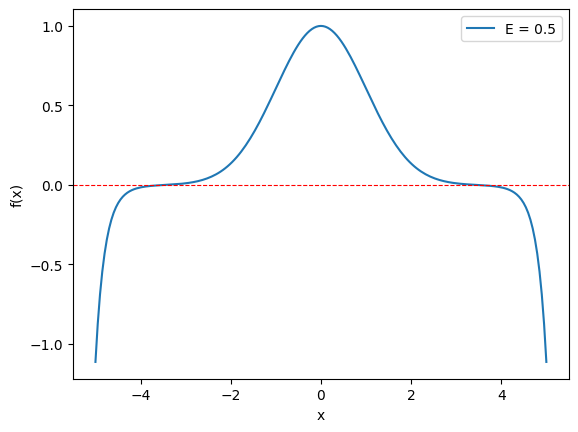

In [6]:

# Suponiendo que ya encontraste E0 con find_energy_bisection
E0 = 0.5 # o el valor aproximado encontrado
x_eval = np.linspace(0, 5, 100)
sol = solve_ivp(
    lambda xx, yy: ec_schordinger(xx, yy, E0),
    (0, 5),
    [1.0, 0.0],  # Solución par
    t_eval=x_eval
)

f_sol = sol.y[0]  # f(x)
x_negativo = -x_eval[::-1]  # Invertir el rango de 0 a 5 para obtener -5 a 0
y_negativo = f_sol[::-1] 

x_completo = np.concatenate((x_negativo, x_eval))
y_completo = np.concatenate((y_negativo, f_sol))

plt.plot(x_completo, y_completo, label=f"E = {E0}")
plt.axhline(0, color='k', linewidth=0.8,linestyle= "--",c="r")
plt.xlabel("x")
plt.ylabel("f(x)")
plt.legend()
plt.show()
